1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mortality = pd.read_csv('water.csv')
mortality.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


In [3]:
mortality.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

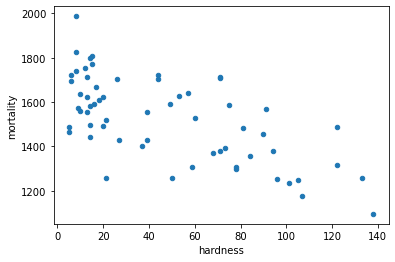

In [4]:
#Строим точечный график для всех данных. Обратная зависимость прослеживается
mortality.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
# Коэф-т корреляции Пирсона
mortality[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# считаем коэф. корреляции Спирмана
mortality[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
# считаем коэф. корреляции Кенделла
mortality[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [ ]:
# Коэф-ты корреляции показывают среднюю обратную зависимость между жесткостью воды и средней годовой смертностью. 
# Чем выше жесткость, тем меньше смертность. Коэф-т корреляции Кенделла показывает меньшую зависимость (-0,45)
# Вообще, по смыслу, сомнительна связь между этими величинами

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X = mortality[['hardness']]
y = mortality['mortality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train.shape

(42, 1)

In [12]:
y_train.shape

(42,)

In [13]:
#Строим модель линейной регрессии и определяем коэффициенты
model = LinearRegression()
model.fit(X_train, y_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [14]:
model.coef_

array([-3.13167087])

In [15]:
model.intercept_

1668.9722977277095

In [ ]:
# Получили уравнение линейной регрессии: mortality = -3.13167087 * hardness + 1668.9722977277095

In [16]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

In [ ]:
# Коэф-т детерминации средний - 0,5, т.е. зависимость mortality от hardness несильная

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [19]:
# Остатки, определяют коэф-т детерминации
y_pred_residuals = (y_test - y_pred)**2

In [20]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test['y_pred_residuals'] = y_pred_residuals
X_test

<ipython-input-20-c656023c29d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred
<ipython-input-20-c656023c29d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_test'] = y_test
<ipython-input-20-c656023c29d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,hardness,y_pred,y_test,y_pred_residuals
0,105,1340.146856,1247,8676.336811
5,10,1637.655589,1558,6345.012860
46,14,1625.128906,1495,16933.532051
31,44,1531.178779,1702,29179.889423
13,78,1424.701970,1307,13853.753671
55,20,1606.338880,1625,348.237389
34,133,1252.460072,1259,42.770662
49,75,1434.096982,1587,23379.332816
12,21,1603.207209,1519,7090.854117
40,6,1650.182272,1696,2099.264154


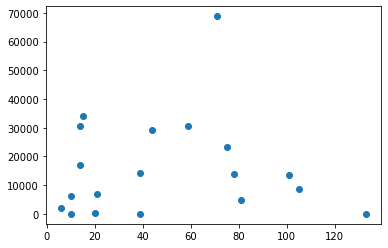

In [25]:
plt.scatter(X_test['hardness'], y_pred_residuals)
# Строим график остатков между прогнозными и реальными данными. Между остатками нет зависимости

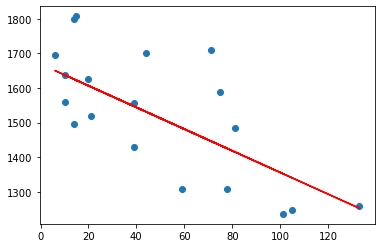

In [23]:
# Строим точечный график и график линейной регрессии
plt.scatter(X_test['hardness'], y_test)
plt.plot(X_test['hardness'], y_pred, c='r')

ЮЖНЫЕ ГОРОДА

In [52]:
# Выбираем данные только для ЮЖНЫХ городов для проверки гипотезы, что смертность зависит от жесткости воды
mortality_south = mortality.loc[mortality['location'] == 'South'].rename(
    columns={'mortality': 'mortality_s', 'hardness':'hardness_s'})
mortality_south

,Unnamed: 0,location,town,mortality_s,hardness_s
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='[hardness_s]', ylabel='[mortality_s]'>

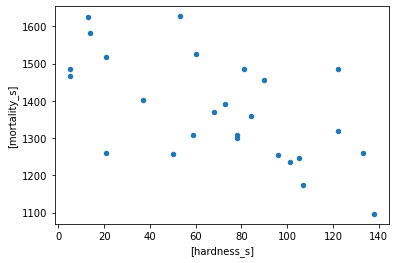

In [53]:
mortality_south.plot(kind='scatter', x=['hardness_s'], y=['mortality_s'])

In [54]:
# Коэф-т корреляции Пирсона
mortality_south[['hardness_s', 'mortality_s']].corr()

,hardness_s,mortality_s
hardness_s,1.000000,-0.602153
mortality_s,-0.602153,1.000000


In [55]:
# считаем коэф. корреляции Спирмана
mortality_south[['hardness_s', 'mortality_s']].corr(method='spearman')

,hardness_s,mortality_s
hardness_s,1.000000,-0.595723
mortality_s,-0.595723,1.000000


In [56]:
# считаем коэф. корреляции Кенделла
mortality_south[['hardness_s', 'mortality_s']].corr(method='kendall')

,hardness_s,mortality_s
hardness_s,1.000000,-0.440315
mortality_s,-0.440315,1.000000


In [ ]:
# Коэф-ты корреляции для южных городов тоже показывают среднюю обратную зависимость между жесткостью воды и средней годовой смертностью, 
# чуть меньше, чем в целом по всей выборке городов. Коэф-т корреляции Кенделла показывает меньшую зависимость (-0,44)
# По-прежнему сомневаемся в смысловой связи между показателями

In [57]:
XS = mortality_south[['hardness_s']]
ys = mortality_south['mortality_s']

In [58]:
XS_train, XS_test, ys_train, ys_test = train_test_split(XS, ys, test_size=0.30, random_state=42)

In [59]:
XS_train.shape

(18, 1)

In [60]:
ys_train.shape

(18,)

In [61]:
#Строим модель линейной регрессии и определяем коэффициенты
model_south = LinearRegression()
model_south.fit(XS_train, ys_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [64]:
model_south.coef_

array([-3.51342921])

In [65]:
model_south.intercept_

1640.2204603423374

In [66]:
# Получили уравнение линейной регрессии: mortality_s = -3.51342921 * hardness_s + 1640.2204603423374

In [67]:
model_south.score(XS_test, ys_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

In [68]:
# Коэф-т детерминации средний отрицательный, значит, линейная регрессия описывает данные хуже, чем средние значения

In [69]:
ys_pred = model_south.predict(XS_test)
ys_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [70]:
# Остатки, определяют коэф-т детерминации
ys_pred_residuals = (ys_test - ys_pred)**2

In [71]:
XS_test['ys_pred'] = ys_pred
XS_test['ys_test'] = ys_test
XS_test['ys_pred_residuals'] = ys_pred_residuals
XS_test

<ipython-input-71-48a2feefbc17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XS_test['ys_pred'] = ys_pred
<ipython-input-71-48a2feefbc17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XS_test['ys_test'] = ys_test
<ipython-input-71-48a2feefbc17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,hardness_s,ys_pred,ys_test,ys_pred_residuals
18,122,1211.582096,1318,11324.770200
38,5,1622.653314,1486,18674.128304
0,105,1271.310393,1247,590.995210
58,122,1211.582096,1486,75305.185799
27,37,1510.223579,1402,11712.343156
19,21,1566.438447,1260,93904.521728
33,59,1432.928137,1309,15358.183094
2,5,1622.653314,1466,24540.260875


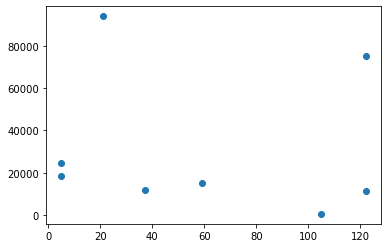

In [73]:
plt.scatter(XS_test['hardness_s'], ys_pred_residuals)
# Строим график остатков между прогнозными и реальными данными. Затрудняюсь интерпретировать!?

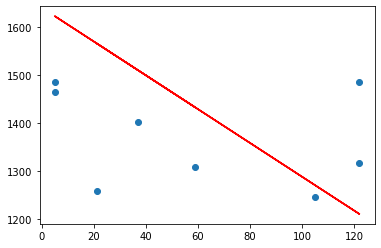

In [74]:
# Строим точечный график и график линейной регрессии
# Видно, что зависимость обманчива, нет очевидной связи между жесткостью воды и смертностью для южных городов
plt.scatter(XS_test['hardness_s'], ys_test)
plt.plot(XS_test['hardness_s'], ys_pred, c='r')

СЕВЕРНЫЕ ГОРОДА

In [76]:
# Выбираем данные только для СЕВЕРНЫХ городов для проверки гипотезы, что смертность зависит от жесткости воды
mortality_north = mortality.loc[mortality['location'] == 'North'].rename(
    columns={'mortality': 'mortality_n', 'hardness':'hardness_n'})
mortality_north

,Unnamed: 0,location,town,mortality_n,hardness_n
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


<AxesSubplot:xlabel='[hardness_n]', ylabel='[mortality_n]'>

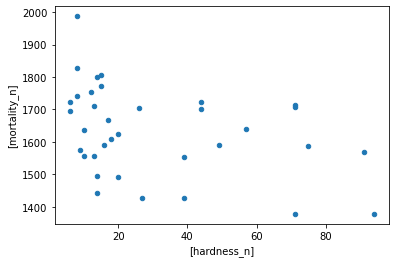

In [77]:
mortality_north.plot(kind='scatter', x=['hardness_n'], y=['mortality_n'])

In [78]:
# Коэф-т корреляции Пирсона
mortality_north[['hardness_n', 'mortality_n']].corr()

,hardness_n,mortality_n
hardness_n,1.000000,-0.368598
mortality_n,-0.368598,1.000000


In [79]:
# считаем коэф. корреляции Спирмана
mortality_north[['hardness_n', 'mortality_n']].corr(method='spearman')

,hardness_n,mortality_n
hardness_n,1.000000,-0.404208
mortality_n,-0.404208,1.000000


In [80]:
# считаем коэф. корреляции Кенделла
mortality_north[['hardness_n', 'mortality_n']].corr(method='kendall')

,hardness_n,mortality_n
hardness_n,1.000000,-0.283058
mortality_n,-0.283058,1.000000


In [ ]:
# Коэф-ты корреляции для северных городов показывают слабую/низкую обратную зависимость между жесткостью воды и средней годовой смертностью, 
#Коэф-т корреляции Кенделла очень мал (-0,28)
# Вот и подтверждение, что смысловой связи между показателями нет

In [81]:
XN = mortality_north[['hardness_n']]
yn = mortality_north['mortality_n']

In [82]:
XN_train, XN_test, yn_train, yn_test = train_test_split(XN, yn, test_size=0.30, random_state=42)

In [83]:
XN_train.shape

(24, 1)

In [84]:
yn_train.shape

(24,)

In [85]:
#Строим модель линейной регрессии и определяем коэффициенты
model_north = LinearRegression()
model_north.fit(XN_train, yn_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [86]:
model_north.coef_

array([-1.97686226])

In [87]:
model_north.intercept_

1688.150229031281

In [66]:
# Получили уравнение линейной регрессии: mortality_n = -1.97686226 * hardness_n + 1688.150229031281

In [88]:
model_north.score(XN_test, yn_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

In [68]:
# Коэф-т детерминации практически равен нулю, значит, линейная регрессия описывает данные не лучше, чем средние значения

In [89]:
yn_pred = model_north.predict(XN_test)
yn_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [90]:
# Остатки, определяют коэф-т детерминации
yn_pred_residuals = (yn_test - yn_pred)**2

In [91]:
XN_test['yn_pred'] = yn_pred
XN_test['yn_test'] = yn_test
XN_test['yn_pred_residuals'] = yn_pred_residuals
XN_test

<ipython-input-91-c8c7c1c749b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XN_test['yn_pred'] = yn_pred
<ipython-input-91-c8c7c1c749b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XN_test['yn_test'] = yn_test
<ipython-input-91-c8c7c1c749b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,hardness_n,yn_pred,yn_test,yn_pred_residuals
45,8,1672.335331,1987,99013.853948
23,9,1670.358469,1574,9284.954488
43,14,1660.474157,1444,46861.060818
36,6,1676.289055,1724,2276.334228
26,16,1656.520433,1591,4292.927124
50,71,1547.793009,1713,27293.350018
31,44,1601.168290,1702,10167.033825
22,8,1672.335331,1742,4853.166114
16,39,1611.052601,1555,3141.894066
28,15,1658.497295,1772,12882.864013


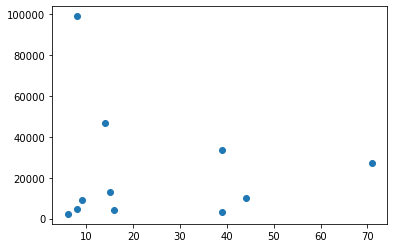

In [92]:
plt.scatter(XN_test['hardness_n'], yn_pred_residuals)
# Строим график остатков между прогнозными и реальными данными. Затрудняюсь интерпретировать!?

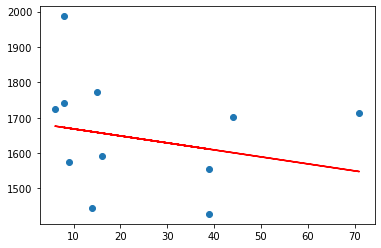

In [94]:
# Строим точечный график и график линейной регрессии
# Видно, что зависимости нет между жесткостью воды и смертностью для северных городов
plt.scatter(XN_test['hardness_n'], yn_test)
plt.plot(XN_test['hardness_n'], yn_pred, c='r')

Таким образом, поскольку нет зависимости между жесткостью воды и смертностью в южных и северных городах по-отдельности, то и нет зависимости для полной выборки по всем городам. Определенная расчетно и визульно зависимость показателей для всей выборки была кажущейся, совпадение данных без смыслового наполнения. Это подтвердилось при анализе данных по отдельным регионам.